<a href="https://colab.research.google.com/github/SimonSaysGiveMeSmile/Caffeinated-Treasury-Bot-ORIE-4741-/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ORIE 4741 / 5741 Term Project**
## *- Caffinated Treasury Bot - Data Analysis*

### Authors:
Cecilia Yang - xy96@cornell.edu <br>
Kayla Yang - cy354@cornell.edu<br>
Simon (Jiahe) Tian - jt886@cornell.edu <br>

## Import Libraries

In [25]:
# Import data manipulation libraries
#import necessary packages
import re
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
px.defaults.width, px.defaults.height = 1000, 600

# Set precision
pd.set_option('display.precision', 4)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This sets the aesthetics for seaborn plots
sns.set()

from scipy.stats import percentileofscore

## Import Cleaned Datasets

In [2]:
df_train=pd.read_csv('train_cleaned.csv')
df_test=pd.read_csv('test_cleaned.csv')

In [3]:
# Understand the statistics of the datasets
print("Size of the cleaned training set: ", df_train.shape)
print("Size of the cleaned testing set: ", df_test.shape)

Size of the cleaned training set:  (44681, 28)
Size of the cleaned testing set:  (21938, 27)


In [4]:
print("Stats of the training dataset:")
df_train.describe()

Stats of the training dataset:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,44681.0000,4.4681e+04,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000,44681.0000
mean,32.8546,1.7716e+05,3996.5620,5.5762,5.6755,15.3511,4.0071,22.3009,13.8652,10.7977,6.1404,1524.4134,32.1572,17.6738,109.5443,188.2025,380.4220
std,10.6227,1.4522e+06,3066.5046,2.5571,2.0818,8.8582,2.2245,15.2076,6.1728,6.9340,3.9048,1196.6700,5.0647,8.3340,94.3603,192.7834,193.8858
min,14.0000,7.0059e+03,303.6454,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,-6.4500,0.0000,0.2300,20.0000,0.1667,4.4628,0.0000,0.0078
25%,24.0000,1.8755e+04,1567.7867,4.0000,4.0000,8.0000,2.0000,11.0000,9.0000,5.6600,3.0000,614.6000,27.9693,11.0833,40.1775,69.8446,264.4731
50%,32.0000,3.5854e+04,2975.7250,6.0000,6.0000,15.0000,4.0000,19.0000,14.0000,9.7300,6.0000,1255.5700,32.1649,17.5000,75.0023,124.1070,324.0091
75%,41.0000,6.9342e+04,5685.0567,8.0000,7.0000,21.0000,6.0000,29.0000,19.0000,15.5200,9.0000,2164.8400,36.3697,24.2500,155.9091,226.9512,441.2153
max,95.0000,2.4198e+07,15204.6333,11.0000,11.0000,34.0000,9.0000,67.0000,28.0000,36.4900,17.0000,4998.0700,49.5645,33.6667,499.9292,1977.3261,1552.9461


We can see that both the training and the testing dataset have an identical characteristics across their columns.

In [39]:
df_train_reduced = df_test.drop(['Customer_ID', 'ID', 'Name', 'SSN', 'Occupation','Monthly_Inhand_Salary'], axis = 1)

df_train_reduced.head(100)

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,October,24.0,19114.12,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9.0,...,4.0,Good,809.98,33.0531,22.8333,No,49.5749,21.4654,High_spent_Medium_value_payments,361.4440
1,September,28.0,34847.84,2,4,6,1.0,Credit-Builder Loan,3,1.0,...,5.0,Good,605.03,25.9268,27.2500,No,18.8162,39.6840,High_spent_Large_value_payments,485.2984
2,October,28.0,34847.84,2,4,6,1.0,Credit-Builder Loan,3,3.0,...,5.0,Good,605.03,30.1166,27.3333,No,18.8162,251.6274,Low_spent_Large_value_payments,303.3551
3,November,28.0,34847.84,2,4,6,1.0,Credit-Builder Loan,3,3.0,...,5.0,_,605.03,30.9964,27.4167,No,18.8162,72.6801,High_spent_Large_value_payments,452.3023
4,December,28.0,34847.84,2,4,6,1.0,Credit-Builder Loan,3,3.0,...,5.0,_,605.03,33.8752,27.5000,No,18.8162,153.5345,Low_spent_Small_value_payments,421.4480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,October,14.0,39887.22,9,9,16,5.0,"Not Specified, Student Loan, Auto Loan, Home E...",57,19.0,...,14.0,Bad,3119.60,32.0883,13.1667,Yes,133.4708,132.5197,High_spent_Medium_value_payments,306.5029
96,November,15.0,39887.22,9,9,16,5.0,"Not Specified, Student Loan, Auto Loan, Home E...",57,19.0,...,14.0,Bad,3119.60,32.1820,13.2500,Yes,133.4708,130.8918,Low_spent_Small_value_payments,308.1309
97,September,44.0,14129.76,8,5,21,8.0,"Student Loan, Payday Loan, Personal Loan, Not ...",62,18.0,...,6.0,Bad,4071.62,26.8314,13.2500,NM,70.9751,130.8918,Low_spent_Small_value_payments,237.1027
98,October,44.0,14129.76,8,5,21,8.0,"Student Loan, Payday Loan, Personal Loan, Not ...",62,18.0,...,6.0,Bad,4071.62,30.4766,13.3333,Yes,70.9751,14.8969,High_spent_Medium_value_payments,254.6385


### General Distribution of the Data

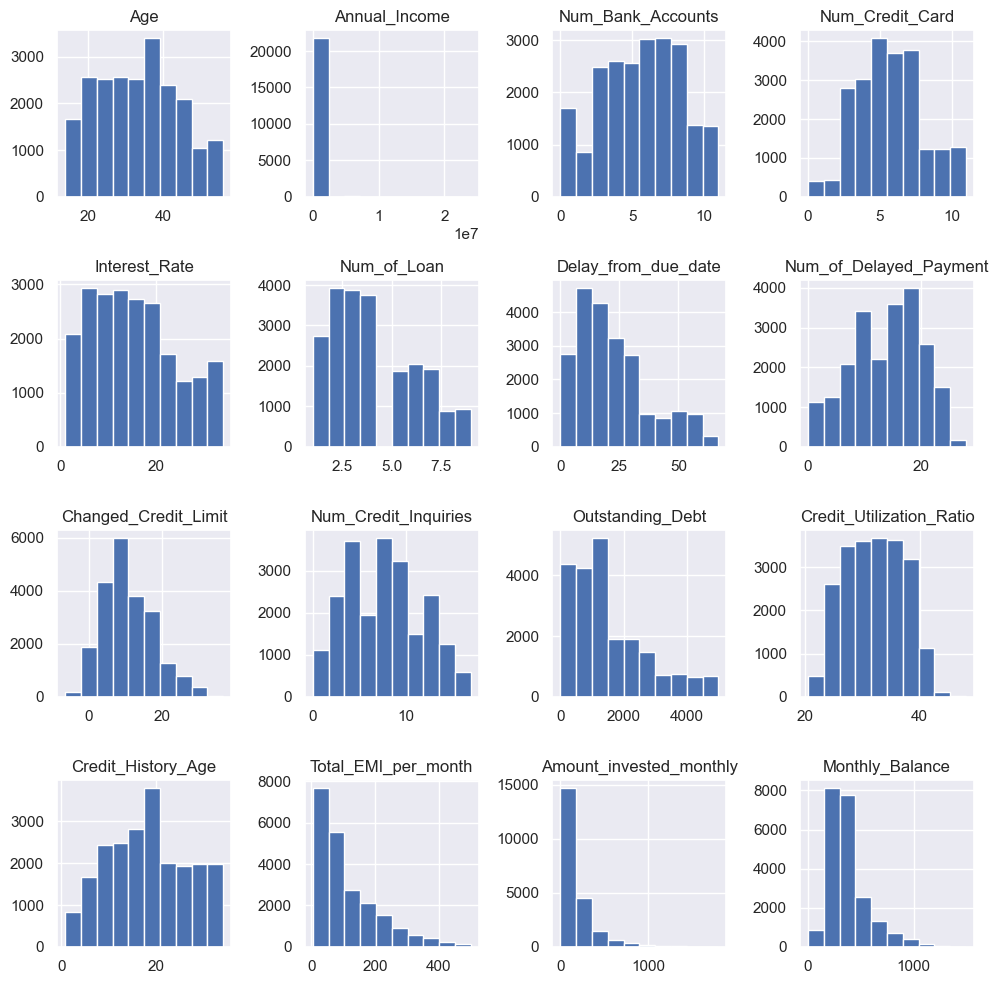

In [35]:
df_train_reduced.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

### Obervations:

***Right-Skewed***:

- Annual Income

- Interest Rate

- Number of Loan 

- Delay from Due Date

- Changed Credit Limit

- Outstanding Debt

- Credit History Age 

- Total EMI per Month

- Amount Invested Monthly

- Monthly Balance

***Left-Skewed***:

- Number of Delayed Payment


***Symmetrical***:

- Age 

- Number of Bank Accounts

- Number of Credit Cards

- Number of Credit Inquiries

- Credit Utilization Ratio


### Correlation map of Numerical Columns

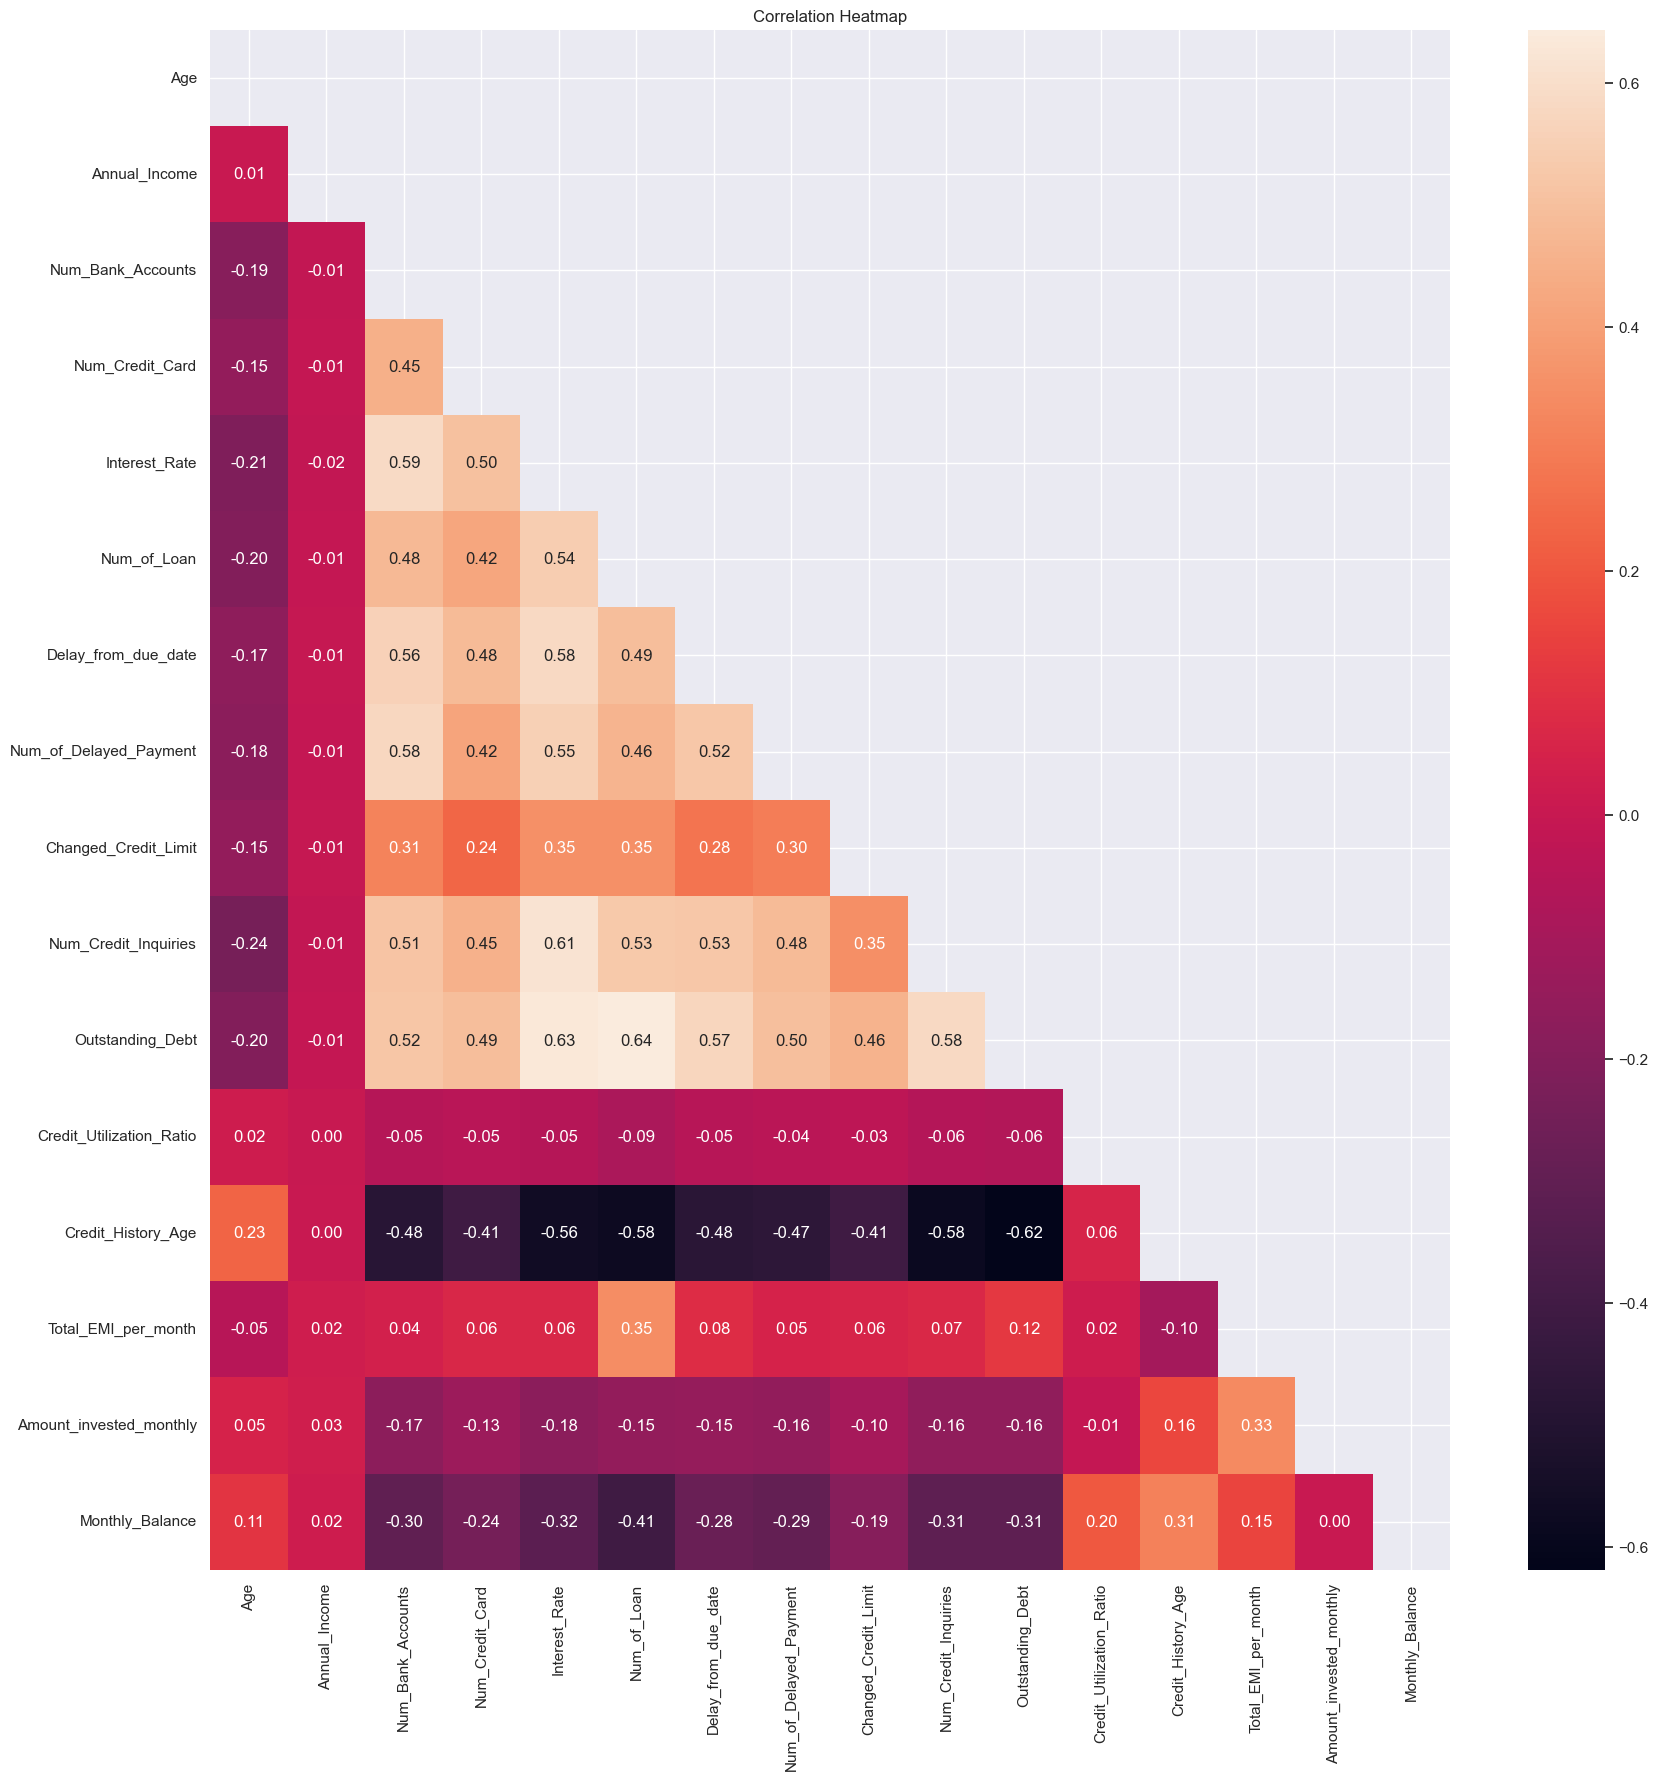

In [36]:
plt.figure(figsize=(20, 20))
correlation = df_train_reduced.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation,  mask=mask, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Observations:

From the above correlation matrix, the below columns have high correlations:

- Credit history age and Number of Bank Accounts: -.48

- Interest rate and Number of Loans: -0.58

- Number of Credit Inquiries and Credit History Age: -0.58

- Outstanding Debt and Credit History Age: -0.62


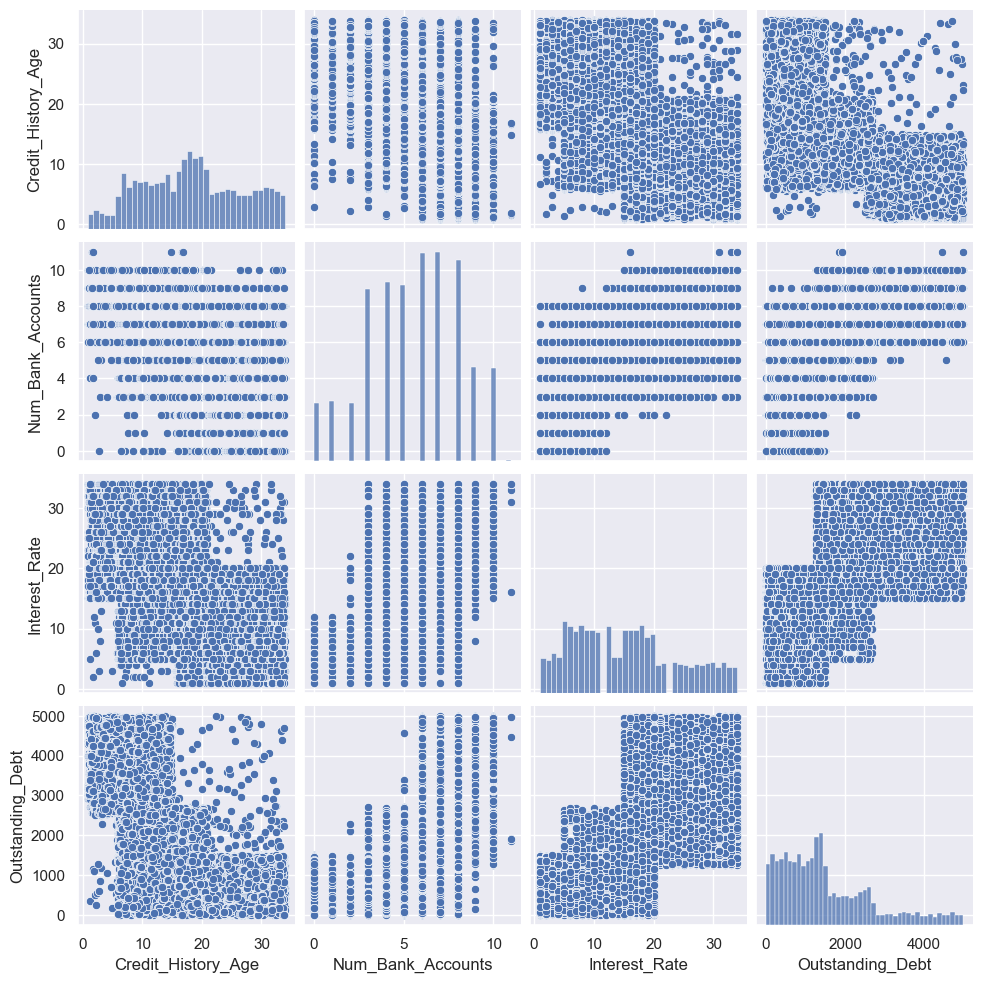

In [37]:
sns.pairplot(df_train_reduced[['Credit_History_Age','Num_Bank_Accounts','Interest_Rate','Outstanding_Debt']])
plt.show()

### Observations:

From the above plot, we can see that 

- interest rate and credit hitory age are approximately having a linear relationship

- outstanding debt and credit history age are also having a linear relationship


### Modify Categorical Columns
Now we want to examine the non-numerical columns to apply one-hot encoding method

In [33]:
# To count the frequency of all unique values within the columns

for column in df_train_reduced.columns:
    print(f"Unique values in column {column}:")
    print(df_train_reduced[column].value_counts())
    print("\n")

Unique values in column Customer_ID:
Customer_ID
CUS_0x4c9f    4
CUS_0xa72c    4
CUS_0x6d63    4
CUS_0x9941    4
CUS_0x3797    4
             ..
CUS_0xbcb2    1
CUS_0x38d8    1
CUS_0x4f52    1
CUS_0xb28a    1
CUS_0x39e5    1
Name: count, Length: 10165, dtype: int64


Unique values in column Month:
Month
November     5578
October      5492
December     5470
September    5398
Name: count, dtype: int64


Unique values in column Age:
Age
39.0    733
22.0    715
32.0    711
35.0    691
37.0    686
27.0    683
44.0    674
25.0    669
26.0    666
29.0    655
41.0    655
36.0    655
24.0    643
19.0    635
38.0    626
20.0    625
45.0    622
34.0    621
28.0    617
33.0    604
30.0    604
42.0    598
43.0    584
31.0    580
21.0    579
40.0    556
23.0    546
46.0    522
18.0    423
15.0    403
17.0    374
16.0    366
48.0    273
49.0    265
47.0    264
54.0    259
51.0    255
53.0    254
50.0    253
55.0    252
52.0    241
56.0    203
14.0     98
Name: count, dtype: int64


Unique values in c

## Observations:

**Unique values in column Month:** <br>

November_____5578 <br>
October_______5492 <br>
December_____5470 <br>
September____5398 <br>

Name: count, dtype: int64 <br>

---

**Unique values in column Type_of_Loan:**  <br>

Not Specified__________________________________337 <br>
Credit-Builder Loan____________________________323  <br>
Personal Loan_________________________________320  <br>
Debt Consolidation Loan_______________________317  <br>
Payday Loan___________________________________308  <br><br>

Auto Loan, Home Equity Loan, <br>Debt Consolidation Loan,<br> and Student Loan________________________________1  <br><br>

Auto Loan, Home Equity Loan, <br>Home Equity Loan,<br> and Debt Consolidation__________________________1 <br><br>

Not Specified, Home Equity Loan,<br> Payday Loan, Debt Consolidation Loan, <br>Credit-Builder Loan, Payday Loan, <br>Student Loan, Personal Loan,<br> and Debt Consolidation Loan_____________________1 <br><br>

Personal Loan, Debt Consolidation Loan, <br>Personal Loan, Not Specified, <br>Debt Consolidation Loan, Personal Loan, <br>and Mortgage Loan______________________________1 <br><br>

Not Specified, Debt Consolidation Loan, <br>Payday Loan, Home Equity Loan, <br>Credit-Builder Loan, and Payday Loan_____________1 <br><br>

Name: count, Length: 5833, dtype: int64<br>

---

**Unique values in column Credit_Mix:**

Standard____8079 <br>
Bad_________4858 <br>
Good________4645 <br>
dash_________4356 <br><br>
Name: count, dtype: int64

---

**Unique values in column Payment_of_Min_Amount:** <br>
Payment_of_Min_Amount <br>
Yes______12350 <br>
No_______6892 <br>
NM_______2696 <br><br>
Name: count, dtype: int64 <br>

---

**Unique values in column Payment_Behaviour:** <br>
Low_spent_Small_value_payments________7455 <br>
High_spent_Medium_value_payments_____3777 <br>
Low_spent_Medium_value_payments_____3048 <br>
High_spent_Large_value_payments_______2863 <br>
High_spent_Small_value_payments_______2525 <br>
Low_spent_Large_value_payments_______2270 <br> <br>
Name: count, dtype: int64

In [40]:
#replace the original categorical data in the dataframe with its encoded numerical form.
from sklearn.preprocessing import LabelEncoder
categorical=df_train_reduced.select_dtypes(include=['object']).columns

for col in categorical:
    df_train_reduced[col] = LabelEncoder().fit_transform(df_train_reduced[col])
    #fit: finds all unique categories in the column col and assigns each unique category a unique integer. The assignment usually starts from 0 and increases.
    #transform: converts all the categories in the column to their corresponding integer codes as determined by the fit process.
df_train_reduced[categorical]

,Month,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,2,123,1,1,1
1,3,636,1,1,0
2,2,636,1,1,3
3,1,636,3,1,0
4,0,636,3,1,5
...,...,...,...,...,...
21933,3,4577,0,2,5
21934,2,4577,0,2,5
21935,1,4577,0,2,2
21936,2,635,1,1,3


In [41]:
unique_counts = {col: df_train_reduced[col].nunique() for col in categorical}

# Print the number of unique values per column
unique_counts

{'Month': 4,
 'Type_of_Loan': 5833,
 'Credit_Mix': 4,
 'Payment_of_Min_Amount': 3,
 'Payment_Behaviour': 6}

In [42]:
for column in categorical:
    print(f"Unique values in column {column}:")
    print(df_train_reduced[column].value_counts())
    print("\n")

Unique values in column Month:
1    5578
2    5492
0    5470
3    5398
Name: Month, dtype: int64


Unique values in column Type_of_Loan:
3237    337
636     323
4544    320
1310    317
3867    308
       ... 
232       1
242       1
3474      1
4735      1
3416      1
Name: Type_of_Loan, Length: 5833, dtype: int64


Unique values in column Credit_Mix:
2    8079
0    4858
1    4645
3    4356
Name: Credit_Mix, dtype: int64


Unique values in column Payment_of_Min_Amount:
2    12350
1     6892
0     2696
Name: Payment_of_Min_Amount, dtype: int64


Unique values in column Payment_Behaviour:
5    7455
1    3777
4    3048
0    2863
2    2525
3    2270
Name: Payment_Behaviour, dtype: int64




### old code

In [ ]:
# Use one-hot encoding to convert string into numeric repersentations

df_train_onehot = df_train_reduced

month_to_number = {
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}

credit_to_number = {
  'Good': 3,
  'Standard': 2,
  'Bad': 1,
}

df_train_onehot['Month'] = df_train_reduced['Month'].replace(month_to_number)
df_train_onehot['Credit_Mix'] = df_train_reduced['Credit_Mix'].replace(credit_to_number)


df_train_onehot

In [36]:
corr_matrix = df_train.corr()

plt.figure(figsize = (15, 5))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", square = True)
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: '0x1602'

In [37]:
print("Stats of the testing dataset:")
df_test.describe()

Stats of the testing dataset:


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,21938.000,2.1938e+04,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000,21938.0000
mean,33.376,1.5839e+05,3936.8754,5.5636,5.6742,15.3515,3.9973,22.3138,13.8447,10.7380,7.6749,1533.9416,32.1243,18.1718,113.7971,185.1059,378.4843
std,10.605,1.3156e+06,3040.6639,2.5767,2.0970,8.8810,2.2285,15.2552,6.1866,6.9611,3.9881,1193.9589,5.0464,8.3338,98.0876,187.3826,191.7136
min,14.000,7.0059e+03,303.6454,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,-6.4500,0.0000,0.2300,20.5097,0.8333,4.4628,0.0000,0.1034
25%,25.000,1.8668e+04,1548.3483,4.0000,4.0000,8.0000,2.0000,11.0000,9.0000,5.5900,5.0000,628.1100,27.9341,11.5833,41.3204,70.0223,263.9701
50%,33.000,3.5609e+04,2944.6133,6.0000,6.0000,15.0000,4.0000,19.0000,14.0000,9.6800,7.0000,1264.6100,32.1695,18.0000,78.2712,123.5700,322.7969
75%,42.000,6.7686e+04,5532.5033,8.0000,7.0000,21.0000,6.0000,29.0000,19.0000,15.4700,11.0000,2186.2000,36.2740,24.6667,164.0646,222.2886,438.6903
max,56.000,2.4017e+07,15204.6333,11.0000,11.0000,34.0000,9.0000,67.0000,28.0000,36.6500,17.0000,4997.1000,48.0965,34.0000,499.9292,1801.3582,1496.4089
